### Get Stock Price Predictor

In [1]:
# from ipynb.fs.full.Stock_Price_Predictor import *

### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

In [3]:
data = pd.read_csv('google_test.csv') # can replace with any file of the right format.
# stocks = pd.read_csv('google_preprocessed.csv')
# stocks_data = stocks.drop(['Item'], axis =1)

In [4]:
data.head()

,Unnamed: 0,Open,High,Low,Close,Volume,PCT_CHANGE,SMA,EMA,TR,ATR,BB_RANGE,RSI,ADX,Predicted_close
0,3273,1220.000000,1236.439941,1216.579956,1236.130005,1407500,0.007909,0.007241,0.008944,30.400024,18.760492,68.625661,75.608082,23.825579,1229.880125
1,3274,1228.849976,1233.630005,1206.000000,1207.650024,1721100,-0.023040,0.003007,-0.001717,19.859985,18.694989,67.491930,62.823180,24.318978,1239.623867
2,3275,1199.560059,1209.439941,1190.000000,1197.380005,1378800,-0.008504,0.001601,-0.003979,27.630005,19.238989,63.844986,58.951995,23.832932,1211.006668
3,3276,1205.189941,1207.650024,1181.760010,1189.839966,1537600,-0.006297,-0.002000,-0.004752,19.439941,19.646484,58.199201,56.213261,22.935880,1200.895805
4,3277,1191.920044,1191.920044,1164.229980,1178.010010,1471400,-0.009942,-0.007975,-0.006482,25.890015,19.953986,51.505089,52.121918,21.354386,1193.561989


In [5]:
# predictions = model.predict(X_test)
# print(predictions.shape)

In [6]:
#change array into dataframe for strategy
# df = pd.DataFrame(predictions, columns = ['predicted_price_normalized'])
# df.head()

In [7]:
# data = pd.read_csv('google.csv')
# min_p = np.min(data['Close'])
# max_p = np.max(data['Close'])
# print(max_p)
# print(min_p)
# denormalized_p = df['predicted_price_normalized'] * (max_p - min_p) + min_p
# denormalized_p #denormalized predicted_price

In [8]:
# denorm_pred_prices = denormalized_p.to_frame()
# denorm_pred_prices.tail()

## Strategy: Leverage to amplify returns, stop levels to limit losses.
## Want to study how different 1) stop levels, 2) leverage levels affect ROI.


In [9]:
# for higher leverages,'higher' the stop loss level. If 1% leverage, 5% stop loss,
# then if we double leverage: 2% leverage, 2.5% stop loss. To limit downside.

In [10]:
# join the dataframes
data.head()
combined = data #we only have 450 rows of predictions,
#so drop the NaN values for the days we did not predict.

In [11]:
combined['Day Range'] = combined['High'] - combined['Low']
combined['Confidence %'] = (combined['Predicted_close'] - combined['Open'])/combined['Open']*100
print(combined['Confidence %'].mean())
combined.head(20)

0.30461613052707787


,Unnamed: 0,Open,High,Low,Close,Volume,PCT_CHANGE,SMA,EMA,TR,ATR,BB_RANGE,RSI,ADX,Predicted_close,Day Range,Confidence %
0,3273,1220.000000,1236.439941,1216.579956,1236.130005,1407500,0.007909,0.007241,0.008944,30.400024,18.760492,68.625661,75.608082,23.825579,1229.880125,19.859985,0.809846
1,3274,1228.849976,1233.630005,1206.000000,1207.650024,1721100,-0.023040,0.003007,-0.001717,19.859985,18.694989,67.491930,62.823180,24.318978,1239.623867,27.630005,0.876746
2,3275,1199.560059,1209.439941,1190.000000,1197.380005,1378800,-0.008504,0.001601,-0.003979,27.630005,19.238989,63.844986,58.951995,23.832932,1211.006668,19.439941,0.954234
3,3276,1205.189941,1207.650024,1181.760010,1189.839966,1537600,-0.006297,-0.002000,-0.004752,19.439941,19.646484,58.199201,56.213261,22.935880,1200.895805,25.890015,-0.356304
4,3277,1191.920044,1191.920044,1164.229980,1178.010010,1471400,-0.009942,-0.007975,-0.006482,25.890015,19.953986,51.505089,52.121918,21.354386,1193.561989,27.690063,0.137756
5,3278,1175.500000,1177.250000,1163.430054,1172.270020,1120100,-0.004873,-0.010531,-0.005946,27.690063,20.479993,44.608523,50.212285,19.923424,1181.877866,13.819946,0.542566
6,3279,1180.180054,1183.969971,1166.380005,1176.890015,1544500,0.003941,-0.005135,-0.002650,13.819946,20.391992,36.913864,51.744745,18.737218,1176.249971,17.589966,-0.333007
7,3280,1187.540039,1200.199951,1186.359985,1198.979980,1385300,0.018770,0.000320,0.004490,17.589966,20.321490,28.482664,58.346464,18.370411,1180.889439,13.839966,-0.560032
8,3281,1200.050049,1205.810059,1191.239990,1205.540039,914400,0.005471,0.002673,0.004817,13.839966,19.649988,18.355400,60.092542,18.264884,1202.832218,14.570068,0.231838
9,3282,1212.699951,1220.599976,1205.079956,1210.810059,1109000,0.004372,0.005536,0.004669,14.570068,19.204993,10.256718,61.489180,18.746230,1208.926602,15.520020,-0.311153


In [12]:
def compute_leverage_stop_toAssign(conf_lvl, baseLeverage = 5, stop = 5, take_prof = 7):
    if (conf_lvl < 0): #negative confidence, no trade
        return 0, 0, 0 #leverage: 0, stop: 0
    elif (conf_lvl > 0 and conf_lvl < 0.5): # OK confidence
        return baseLeverage, stop, take_prof
    elif (conf_lvl >= 0.5 and conf_lvl <= 1.5): # GOOD confidence
        pct_lev = conf_lvl/(abs(100 - conf_lvl)/100)*10 # % of leverage to take
        pct_stop = stop * baseLeverage/pct_lev
        return pct_lev, pct_stop, take_prof
    elif (conf_lvl <= 10): # VERY GOOD confidence, not expecting confidence above 10%
        pct_lev = conf_lvl/(abs(100 - conf_lvl)/100)*100 # % of leverage to take
        pct_stop = stop * baseLeverage/pct_lev
        return pct_lev, pct_stop, take_prof
    else:
        return -1, -1, -1

In [13]:
compute_leverage_stop_toAssign(2, 5)

(204.08163265306123, 0.1225, 7)

## We want to make trades with  good RR ratio

In [14]:
#leverage is based on capital
combined.head()

,Unnamed: 0,Open,High,Low,Close,Volume,PCT_CHANGE,SMA,EMA,TR,ATR,BB_RANGE,RSI,ADX,Predicted_close,Day Range,Confidence %
0,3273,1220.000000,1236.439941,1216.579956,1236.130005,1407500,0.007909,0.007241,0.008944,30.400024,18.760492,68.625661,75.608082,23.825579,1229.880125,19.859985,0.809846
1,3274,1228.849976,1233.630005,1206.000000,1207.650024,1721100,-0.023040,0.003007,-0.001717,19.859985,18.694989,67.491930,62.823180,24.318978,1239.623867,27.630005,0.876746
2,3275,1199.560059,1209.439941,1190.000000,1197.380005,1378800,-0.008504,0.001601,-0.003979,27.630005,19.238989,63.844986,58.951995,23.832932,1211.006668,19.439941,0.954234
3,3276,1205.189941,1207.650024,1181.760010,1189.839966,1537600,-0.006297,-0.002000,-0.004752,19.439941,19.646484,58.199201,56.213261,22.935880,1200.895805,25.890015,-0.356304
4,3277,1191.920044,1191.920044,1164.229980,1178.010010,1471400,-0.009942,-0.007975,-0.006482,25.890015,19.953986,51.505089,52.121918,21.354386,1193.561989,27.690063,0.137756


In [15]:
combined['x'] = combined['Confidence %'].apply(compute_leverage_stop_toAssign)
combined[['Leverage Pct', 'Stop Loss', 'Take Profit']] = combined['x'].apply(pd.Series)
combined.tail()
combined.head(15)

,Unnamed: 0,Open,High,Low,Close,Volume,PCT_CHANGE,SMA,EMA,TR,...,BB_RANGE,RSI,ADX,Predicted_close,Day Range,Confidence %,x,Leverage Pct,Stop Loss,Take Profit
0,3273,1220.000000,1236.439941,1216.579956,1236.130005,1407500,0.007909,0.007241,0.008944,30.400024,...,68.625661,75.608082,23.825579,1229.880125,19.859985,0.809846,"(8.164583773257169, 3.0620054486900723, 7)",8.164584,3.062005,7.0
1,3274,1228.849976,1233.630005,1206.000000,1207.650024,1721100,-0.023040,0.003007,-0.001717,19.859985,...,67.491930,62.823180,24.318978,1239.623867,27.630005,0.876746,"(8.845007204240273, 2.826453322504369, 7)",8.845007,2.826453,7.0
2,3275,1199.560059,1209.439941,1190.000000,1197.380005,1378800,-0.008504,0.001601,-0.003979,27.630005,...,63.844986,58.951995,23.832932,1211.006668,19.439941,0.954234,"(9.634273142914708, 2.594902555610606, 7)",9.634273,2.594903,7.0
3,3276,1205.189941,1207.650024,1181.760010,1189.839966,1537600,-0.006297,-0.002000,-0.004752,19.439941,...,58.199201,56.213261,22.935880,1200.895805,25.890015,-0.356304,"(0, 0, 0)",0.000000,0.000000,0.0
4,3277,1191.920044,1191.920044,1164.229980,1178.010010,1471400,-0.009942,-0.007975,-0.006482,25.890015,...,51.505089,52.121918,21.354386,1193.561989,27.690063,0.137756,"(5, 5, 7)",5.000000,5.000000,7.0
5,3278,1175.500000,1177.250000,1163.430054,1172.270020,1120100,-0.004873,-0.010531,-0.005946,27.690063,...,44.608523,50.212285,19.923424,1181.877866,13.819946,0.542566,"(5.455260668104893, 4.582732434064377, 7)",5.455261,4.582732,7.0
6,3279,1180.180054,1183.969971,1166.380005,1176.890015,1544500,0.003941,-0.005135,-0.002650,13.819946,...,36.913864,51.744745,18.737218,1176.249971,17.589966,-0.333007,"(0, 0, 0)",0.000000,0.000000,0.0
7,3280,1187.540039,1200.199951,1186.359985,1198.979980,1385300,0.018770,0.000320,0.004490,17.589966,...,28.482664,58.346464,18.370411,1180.889439,13.839966,-0.560032,"(0, 0, 0)",0.000000,0.000000,0.0
8,3281,1200.050049,1205.810059,1191.239990,1205.540039,914400,0.005471,0.002673,0.004817,13.839966,...,18.355400,60.092542,18.264884,1202.832218,14.570068,0.231838,"(5, 5, 7)",5.000000,5.000000,7.0
9,3282,1212.699951,1220.599976,1205.079956,1210.810059,1109000,0.004372,0.005536,0.004669,14.570068,...,10.256718,61.489180,18.746230,1208.926602,15.520020,-0.311153,"(0, 0, 0)",0.000000,0.000000,0.0


## Trade scope: Weekly (buy/sell within each week)

In [16]:
# combined['T+' + str(1)] = combined['Confidence %'].shift(1)
# combined['T+' + str(2)] = combined['Confidence %'].shift(2)
# combined['T+' + str(3)] = combined['Confidence %'].shift(3)
# combined['T+' + str(4)] = combined['Confidence %'].shift(4)
# combined['T+' + str(5)] = combined['Confidence %'].shift(5)
# combined['T+' + str(6)] = combined['Confidence %'].shift(6)
# combined['T+' + str(7)] = combined['Confidence %'].shift(7)
combined.head(100)

,Unnamed: 0,Open,High,Low,Close,Volume,PCT_CHANGE,SMA,EMA,TR,...,BB_RANGE,RSI,ADX,Predicted_close,Day Range,Confidence %,x,Leverage Pct,Stop Loss,Take Profit
0,3273,1220.000000,1236.439941,1216.579956,1236.130005,1407500,0.007909,0.007241,0.008944,30.400024,...,68.625661,75.608082,23.825579,1229.880125,19.859985,0.809846,"(8.164583773257169, 3.0620054486900723, 7)",8.164584,3.062005,7.0
1,3274,1228.849976,1233.630005,1206.000000,1207.650024,1721100,-0.023040,0.003007,-0.001717,19.859985,...,67.491930,62.823180,24.318978,1239.623867,27.630005,0.876746,"(8.845007204240273, 2.826453322504369, 7)",8.845007,2.826453,7.0
2,3275,1199.560059,1209.439941,1190.000000,1197.380005,1378800,-0.008504,0.001601,-0.003979,27.630005,...,63.844986,58.951995,23.832932,1211.006668,19.439941,0.954234,"(9.634273142914708, 2.594902555610606, 7)",9.634273,2.594903,7.0
3,3276,1205.189941,1207.650024,1181.760010,1189.839966,1537600,-0.006297,-0.002000,-0.004752,19.439941,...,58.199201,56.213261,22.935880,1200.895805,25.890015,-0.356304,"(0, 0, 0)",0.000000,0.000000,0.0
4,3277,1191.920044,1191.920044,1164.229980,1178.010010,1471400,-0.009942,-0.007975,-0.006482,25.890015,...,51.505089,52.121918,21.354386,1193.561989,27.690063,0.137756,"(5, 5, 7)",5.000000,5.000000,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3368,1165.520020,1181.400024,1161.530029,1171.079956,1800700,0.014142,-0.009323,-0.004704,34.130005,...,77.406571,52.040871,24.461588,1157.121416,19.869995,-0.720589,"(0, 0, 0)",0.000000,0.000000,0.0
96,3369,1157.800049,1179.869995,1150.839966,1175.910034,1534300,0.004124,-0.006902,-0.001761,19.869995,...,73.935557,53.125576,22.738596,1174.137834,29.030029,1.411106,"(14.313030928703785, 1.7466600976781406, 7)",14.313031,1.746660,7.0
97,3370,1186.430054,1206.280029,1174.000000,1206.189941,1505800,0.025750,-0.000698,0.007409,29.030029,...,65.534268,59.334935,21.940920,1179.372045,32.280029,-0.594895,"(0, 0, 0)",0.000000,0.000000,0.0
98,3371,1199.989990,1204.459961,1184.890015,1188.900024,1020900,-0.014334,-0.001013,0.000161,32.280029,...,53.956884,54.865685,21.200221,1210.027240,19.569946,0.836444,"(8.434998380872134, 2.963841707034819, 7)",8.434998,2.963842,7.0


In [17]:
# combined.drop('T+1', 1, inplace = True)
# combined.drop('T+2', 1, inplace = True)
# combined.drop('T+3', 1, inplace = True)
# combined.drop('T+4', 1, inplace = True)
# combined.drop('T+5', 1, inplace = True)
# combined.drop('T+6', 1, inplace = True)
# combined.drop('T+7', 1, inplace = True)

In [18]:
# Want to shift 'x', want to maintain an entry price. 
# Compute 'leveraged position', 'stop loss price', and 'take profit price' upon trade

In [19]:
def enterTrade(price, leverage_pct, stop_loss, take_profit):
    entry_price = price
    if (capital <= 0):
        print("No more capital. End.")
    leveraged_position = (1 + (leverage_pct/100)) * capital
    trade_size = leveraged_position/price
    stop_loss_price = (1 - (stop_loss/100)) * entry_price
    take_profit_price = (1 + (take_profit/100))* entry_price
    print(entry_price)
    print(stop_loss_price)
    print(take_profit_price)
    print(leverage_pct)
    print("entered trade")
    return True, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price
    
def exitTrade(entryPrice, exitPrice, trade_size, capital):
    #compute gains/losses and start fresh
    print('exiting trade')
    returns = (exitPrice - entryPrice) * trade_size
    print('Entry Price: ' + str(entryPrice))
    print('Exit Price: ' + str(exitPrice))
    print('Leveraged_Position: ' + str(leveraged_position))
    print("Gained/Lost: " + str(returns))
    capital += returns
#     in_trade = False
#     entry_price = 0
#     leveraged_position = 0
#     stop_loss_price = 0
#     take_profit_price = 0
    return False, 0, 0, 0, 0, 0, capital

## Configure 'Take Profit' to study different profit taking levels that yield the highest return.

In [20]:
days = []
cur_capital = []
capital = 1000
in_trade = False
entry_price = 0
trade_size = 0
leveraged_position = 0 #amount in $ involved in trade
stop_loss_price = 0
take_profit_price = 0

In [21]:
combined['Take Profit'] = 10
for i, row in combined.iterrows():
    days.append(i)
    cur_capital.append(capital)
    if (in_trade == False): # check for opportunity to make a trade
        if (row['Confidence %'] > 0 and row['Confidence %'] < 5):
            in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price = enterTrade(row['Open'], row['Leverage Pct'], row['Stop Loss'], row['Take Profit'])
            print("take profit at: " + str(take_profit_price))
            print("stop loss at: " + str(stop_loss_price))
        else:
            print('no trade, confidence too extreme or low')
    else:
        print('In a trade, looking to sell')
        if (take_profit_price > row['High']):
            # our target not met, check for need to cut loss.
            if (stop_loss_price > row['Low']):
                # exit trade, limit loss.
                in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price, capital = exitTrade(entry_price, stop_loss_price, trade_size, capital)
                print("Bad trade, capital left: " + str(capital))
            else:
                print('no trade')
                # no trade for the day
        else:
            # target met, sell it.
            in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price, capital = exitTrade(entry_price, take_profit_price, trade_size, capital)
            print("Good trade, capital left: " + str(capital))
            

1220.0
1182.6435335259812
1342.0
8.164583773257169
entered trade
take profit at: 1342.0
stop loss at: 1182.6435335259812
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
exiting trade
Entry Price: 1220.0
Exit Price: 1182.6435335259812
Leveraged_Position: 1081.6458377325716
Gained/Lost: -33.12005448690066
Bad trade, capital left: 966.8799455130993
1191.9200439453125
1132.3240417480467
1311.1120483398438
5.0
entered trade
take profit at: 1311.1120483398438
stop loss at: 1132.3240417480467
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade,

In [22]:
print(capital)
print(len(days))
print(len(cur_capital))
d10 = np.asarray(days)
c10 = np.asarray(cur_capital)

3254.8570623340074
450
450


In [23]:
days = []
cur_capital = []
capital = 1000
in_trade = False
entry_price = 0
trade_size = 0
leveraged_position = 0 #amount in $ involved in trade
stop_loss_price = 0
take_profit_price = 0

combined['Take Profit'] = 20
for i, row in combined.iterrows():
    days.append(i)
    cur_capital.append(capital)
    if (in_trade == False): # check for opportunity to make a trade
        if (row['Confidence %'] > 0 and row['Confidence %'] < 5):
            in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price = enterTrade(row['Open'], row['Leverage Pct'], row['Stop Loss'], row['Take Profit'])
            print("take profit at: " + str(take_profit_price))
            print("stop loss at: " + str(stop_loss_price))
        else:
            print('no trade, confidence too extreme or low')
    else:
        print('In a trade, looking to sell')
        if (take_profit_price > row['High']):
            # our target not met, check for need to cut loss.
            if (stop_loss_price > row['Low']):
                # exit trade, limit loss.
                in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price, capital = exitTrade(entry_price, stop_loss_price, trade_size, capital)
                print("Bad trade, capital left: " + str(capital))
            else:
                print('no trade')
                # no trade for the day
        else:
            # target met, sell it.
            in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price, capital = exitTrade(entry_price, take_profit_price, trade_size, capital)
            print("Good trade, capital left: " + str(capital))

1220.0
1182.6435335259812
1464.0
8.164583773257169
entered trade
take profit at: 1464.0
stop loss at: 1182.6435335259812
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
exiting trade
Entry Price: 1220.0
Exit Price: 1182.6435335259812
Leveraged_Position: 1081.6458377325716
Gained/Lost: -33.12005448690066
Bad trade, capital left: 966.8799455130993
1191.9200439453125
1132.3240417480467
1430.3040527343749
5.0
entered trade
take profit at: 1430.3040527343749
stop loss at: 1132.3240417480467
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade,

In [24]:
print(capital)
print(len(days))
print(len(cur_capital))
d20 = np.asarray(days)
c20 = np.asarray(cur_capital)

2018.754771843638
450
450


In [25]:
days = []
cur_capital = []
capital = 1000
in_trade = False
entry_price = 0
trade_size = 0
leveraged_position = 0 #amount in $ involved in trade
stop_loss_price = 0
take_profit_price = 0

combined['Take Profit'] = 5
for i, row in combined.iterrows():
    days.append(i)
    cur_capital.append(capital)
    if (in_trade == False): # check for opportunity to make a trade
        if (row['Confidence %'] > 0 and row['Confidence %'] < 5):
            in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price = enterTrade(row['Open'], row['Leverage Pct'], row['Stop Loss'], row['Take Profit'])
            print("take profit at: " + str(take_profit_price))
            print("stop loss at: " + str(stop_loss_price))
        else:
            print('no trade, confidence too extreme or low')
    else:
        print('In a trade, looking to sell')
        if (take_profit_price > row['High']):
            # our target not met, check for need to cut loss.
            if (stop_loss_price > row['Low']):
                # exit trade, limit loss.
                in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price, capital = exitTrade(entry_price, stop_loss_price, trade_size, capital)
                print("Bad trade, capital left: " + str(capital))
            else:
                print('no trade')
                # no trade for the day
        else:
            # target met, sell it.
            in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price, capital = exitTrade(entry_price, take_profit_price, trade_size, capital)
            print("Good trade, capital left: " + str(capital))

1220.0
1182.6435335259812
1281.0
8.164583773257169
entered trade
take profit at: 1281.0
stop loss at: 1182.6435335259812
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
exiting trade
Entry Price: 1220.0
Exit Price: 1182.6435335259812
Leveraged_Position: 1081.6458377325716
Gained/Lost: -33.12005448690066
Bad trade, capital left: 966.8799455130993
1191.9200439453125
1132.3240417480467
1251.5160461425783
5.0
entered trade
take profit at: 1251.5160461425783
stop loss at: 1132.3240417480467
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade,

In [26]:
print(capital)
print(len(days))
print(len(cur_capital))
d5 = np.asarray(days)
c5 = np.asarray(cur_capital)

1666.983753064597
450
450


In [27]:
days = []
cur_capital = []
capital = 1000
in_trade = False
entry_price = 0
trade_size = 0
leveraged_position = 0 #amount in $ involved in trade
stop_loss_price = 0
take_profit_price = 0

combined['Take Profit'] = 8
for i, row in combined.iterrows():
    days.append(i)
    cur_capital.append(capital)
    if (in_trade == False): # check for opportunity to make a trade
        if (row['Confidence %'] > 0 and row['Confidence %'] < 5):
            in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price = enterTrade(row['Open'], row['Leverage Pct'], row['Stop Loss'], row['Take Profit'])
            print("take profit at: " + str(take_profit_price))
            print("stop loss at: " + str(stop_loss_price))
        else:
            print('no trade, confidence too extreme or low')
    else:
        print('In a trade, looking to sell')
        if (take_profit_price > row['High']):
            # our target not met, check for need to cut loss.
            if (stop_loss_price > row['Low']):
                # exit trade, limit loss.
                in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price, capital = exitTrade(entry_price, stop_loss_price, trade_size, capital)
                print("Bad trade, capital left: " + str(capital))
            else:
                print('no trade')
                # no trade for the day
        else:
            # target met, sell it.
            in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price, capital = exitTrade(entry_price, take_profit_price, trade_size, capital)
            print("Good trade, capital left: " + str(capital))

1220.0
1182.6435335259812
1317.6000000000001
8.164583773257169
entered trade
take profit at: 1317.6000000000001
stop loss at: 1182.6435335259812
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
exiting trade
Entry Price: 1220.0
Exit Price: 1182.6435335259812
Leveraged_Position: 1081.6458377325716
Gained/Lost: -33.12005448690066
Bad trade, capital left: 966.8799455130993
1191.9200439453125
1132.3240417480467
1287.2736474609376
5.0
entered trade
take profit at: 1287.2736474609376
stop loss at: 1132.3240417480467
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to s

In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
exiting trade
Entry Price: 1544.5
Exit Price: 1514.4829228085225
Leveraged_Position: 2211.9820446468593
Gained/Lost: -42.98946958907541
Bad trade, capital left: 1916.8840331684637
1517.02001953125
1441.1690185546875
1638.38162109375
5.0
entered trade
take profit at: 1638.38162109375
stop loss at: 1441.1690185546875
In a trade, looking to sell
exiting trade
Entry Price: 1517.02001953125
Exit Price: 1638.38162109375
Leveraged_Position: 2012.728234826887
Gained/Lost: 161.018258786151
Good trade, capital left: 2077.9022919546146
1623.5400390625
1542.363037109375
1753.4232421875001
5.0
entered trade
take profit at: 1753.4232421875001
stop loss at: 1542.363037109375
In a trade, looking to sell
no trade
In a trade, looking to sell
exiting trade
Entry Price: 1623.5400390625
Exit Price: 1753.4232421875001
Leveraged_Position: 2181.7974065523454
Gained/Lost: 174.5437925241878
Good trade, capital 

In [28]:
print(capital)
print(len(days))
print(len(cur_capital))
d8 = np.asarray(days)
c8 = np.asarray(cur_capital)

2188.556997887114
450
450


In [29]:
days = []
cur_capital = []
capital = 1000
in_trade = False
entry_price = 0
trade_size = 0
leveraged_position = 0 #amount in $ involved in trade
stop_loss_price = 0
take_profit_price = 0

combined['Take Profit'] = 12
for i, row in combined.iterrows():
    days.append(i)
    cur_capital.append(capital)
    if (in_trade == False): # check for opportunity to make a trade
        if (row['Confidence %'] > 0 and row['Confidence %'] < 5):
            in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price = enterTrade(row['Open'], row['Leverage Pct'], row['Stop Loss'], row['Take Profit'])
            print("take profit at: " + str(take_profit_price))
            print("stop loss at: " + str(stop_loss_price))
        else:
            print('no trade, confidence too extreme or low')
    else:
        print('In a trade, looking to sell')
        if (take_profit_price > row['High']):
            # our target not met, check for need to cut loss.
            if (stop_loss_price > row['Low']):
                # exit trade, limit loss.
                in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price, capital = exitTrade(entry_price, stop_loss_price, trade_size, capital)
                print("Bad trade, capital left: " + str(capital))
            else:
                print('no trade')
                # no trade for the day
        else:
            # target met, sell it.
            in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price, capital = exitTrade(entry_price, take_profit_price, trade_size, capital)
            print("Good trade, capital left: " + str(capital))

1220.0
1182.6435335259812
1366.4
8.164583773257169
entered trade
take profit at: 1366.4
stop loss at: 1182.6435335259812
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
exiting trade
Entry Price: 1220.0
Exit Price: 1182.6435335259812
Leveraged_Position: 1081.6458377325716
Gained/Lost: -33.12005448690066
Bad trade, capital left: 966.8799455130993
1191.9200439453125
1132.3240417480467
1334.9504492187502
5.0
entered trade
take profit at: 1334.9504492187502
stop loss at: 1132.3240417480467
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade,

no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
no trade
In a trade, looking to sell
exiting trade
Entry Price: 1496.1300048828125
Exit Price: 1675.66560546875
Leveraged_Position: 1865.2771246088732
Gained/Lost: 223.83325495306488
Good trade, capital left: 2000.2876593424678
1699.52001953125
1671.000637346815
1903.4624218750002
14.897938606632868
entered trade
take profit at: 190

In [30]:
print(capital)
print(len(days))
print(len(cur_capital))
d12 = np.asarray(days)
c12 = np.asarray(cur_capital)

2218.0576758225884
450
450


## Plotting the graphs 

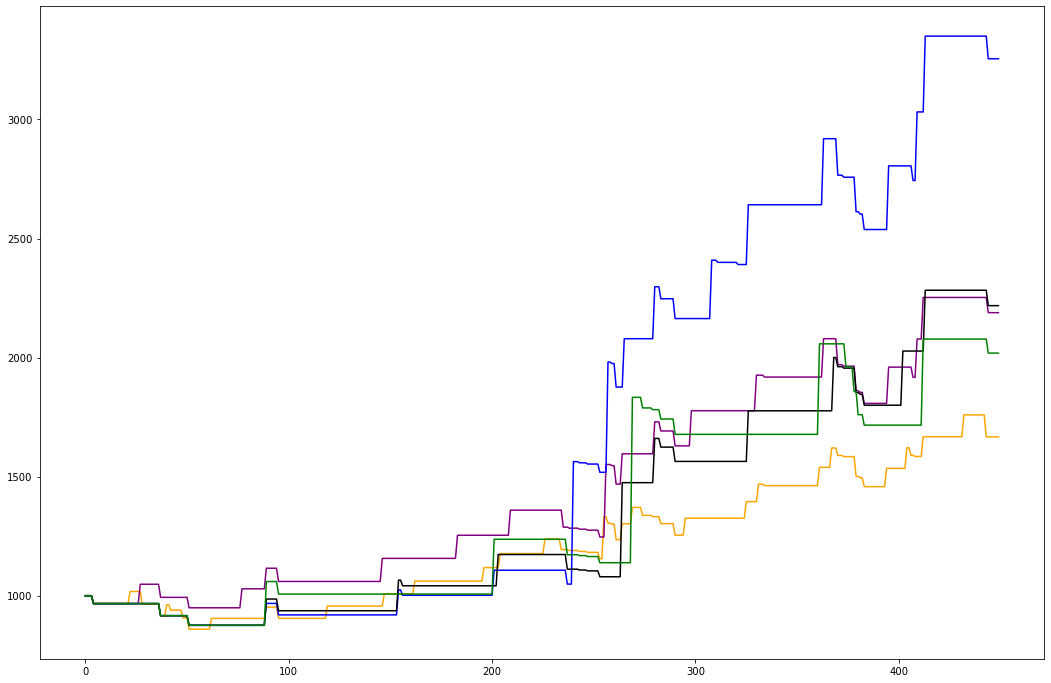

In [31]:
plt.plot(d5, c5, label = '5% take profit', color = 'Orange')
plt.plot(d8, c8, label = '8% take profit', color = 'Purple')
plt.plot(d10, c10, label = '10% take profit', color = 'Blue')
plt.plot(d12, c12, label = '12% take profit', color = 'Black')
plt.plot(d20, c20, label = '20% take profit', color = 'Green')

In [32]:
duration = len(d5)

In [50]:
def calculate_annual_sharpe(arr):
    variance = np.var(arr)
    return_rate = (arr[-1] - 1000)/1000
    print("return rate: " + str(return_rate) + ", sd: " + str(math.sqrt(variance)))
    return (return_rate - 0.05 / math.sqrt(variance)) * math.sqrt(253/duration)

In [59]:
import math
name = [5, 8, 10, 12, 20]
count = 0

for item in [c5, c8, c10, c12, c20]:
    print("For " + str(name[count]) + "% taking profit:")
    sharpe_ratio = calculate_annual_sharpe(item)
    count=count+1
    print("the sharpe ratio is", sharpe_ratio)
    print("------------------------------------------------------------------------------------------")

For 5% taking profit:
return rate: 0.6669837530645971, sd: 260.3612254815928
the sharpe ratio is 0.49997028894025897
------------------------------------------------------------------------------------------
For 8% taking profit:
return rate: 1.188556997887114, sd: 423.70752645448755
the sharpe ratio is 0.8911091354970391
------------------------------------------------------------------------------------------
For 10% taking profit:
return rate: 2.2548570623340076, sd: 865.0654662107582
the sharpe ratio is 1.6906818404482742
------------------------------------------------------------------------------------------
For 12% taking profit:
return rate: 1.2180576758225885, sd: 448.96494031376443
the sharpe ratio is 0.9132341579492781
------------------------------------------------------------------------------------------
For 20% taking profit:
return rate: 1.018754771843638, sd: 409.0944452045352
the sharpe ratio is 0.7637857540567687
----------------------------------------------------